In [ ]:
import numpy as np
import pandas as pd
import re
import string
import time
import nltk

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 44.1 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

###Lowercasing

In [ ]:
df['review'].str.lower().head()

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."


In [ ]:
df['review'] = df['review'].str.lower()

###Remove HTML tags

In [ ]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [ ]:
df['review'].apply(remove_html_tags).head()

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."


In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

###Remove URLs

In [ ]:
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [ ]:
text = "hello please visit https://github.com/deepankargupta856 to view my projects you can google me as well www.google.com "

In [ ]:
remove_urls(text)

'hello please visit  to view my projects you can google me as well  '

In [ ]:
df['review'].apply(remove_urls).head()

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."


In [ ]:
df['review'] = df['review'].apply(remove_urls)

###Remove punctuations

In [ ]:
exclude = string.punctuation
print(exclude)#all punctuations from python

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def self_punc_removal(text):
  for punc in exclude:
    text = text.replace(punc,'')
  return text

In [ ]:
text = 'Hello! how are you doing? '
start = time.time()
print(self_punc_removal(text))
self_time = time.time() - start

Hello how are you doing 


In [ ]:
def auto_remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

In [ ]:
start = time.time()
print(auto_remove_punc(text))
auto_time = time.time() - start

Hello how are you doing 


In [ ]:
self_time/auto_time##self method v/s auto method time taken comparision

4.768025078369906

In [ ]:
df['review'].apply(auto_remove_punc).head()

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [ ]:
df['review'] = df['review'].apply(auto_remove_punc)

###Chatwords conversion

In [ ]:
chat_words  = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}
# from github https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt

In [ ]:
def chat_words_conv(text):
  transformed = []
  for w in text.split():
    if w.upper() in chat_words:
      transformed.append(chat_words[w.upper()])
    else:
      transformed.append(w)
  return ' '.join(transformed)

In [ ]:
chat_words_conv('FYI I used to live in jaipur')

'For Your Information I used to live in jaipur'

In [ ]:
df['review'] = df['review'].apply(chat_words_conv)

###Spelling error handling

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect_text = 'helloe my firend how do yu do?'
textblb = TextBlob(incorrect_text)
textblb.correct().string

'hello my friend how do you do?'

In [ ]:
df['review'] = df['review'].apply(lambda x : str(TextBlob(x).correct()))## notoriously slow as because it checks each word's spelling using a naive probabilistic model.

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

def fast_correct(text):
    words = text.split()
    corrected = [spell.correction(w) or w for w in words]
    return ' '.join(corrected)


In [ ]:
df['review'] = df['review'].apply(fast_correct)

###Stopwords removal

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
eng_stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
  transformed = []
  for w in text.split():
    if w not in eng_stop_words:
      transformed.append(w)
  return ' '.join(transformed)

In [ ]:
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [ ]:
remove_stopwords(df['review'][0])

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

###Emoji handling

remove the emoji using regex

In [ ]:
def remove_emoji_regex(text):
    emoji_regex_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_regex_pattern.sub(r'', text)

In [ ]:
remove_emoji_regex('That feeling when the code finally works 😎🔥💻 #DevLife')

'That feeling when the code finally works  #DevLife'

In [ ]:
remove_emoji_regex('Debugged all errors 💪✅')

'Debugged all errors '

we can also demojize which is to replace emoji with appropriate text

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
emoji.demojize('That feeling when the code finally works 😎🔥💻 #DevLife')

'That feeling when the code finally works :smiling_face_with_sunglasses::fire::laptop: #DevLife'

###Tokenization

2 libraries offer optimized ways to tokenize text
1. NLTK
2. Spacy

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
word_tokenize(df['review'][0])

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'youll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'f

In [ ]:
text = "This is sentence 1. This is sentence 2. This is sentence 3."
sent_tokenize(text)

['This is sentence 1.', 'This is sentence 2.', 'This is sentence 3.']

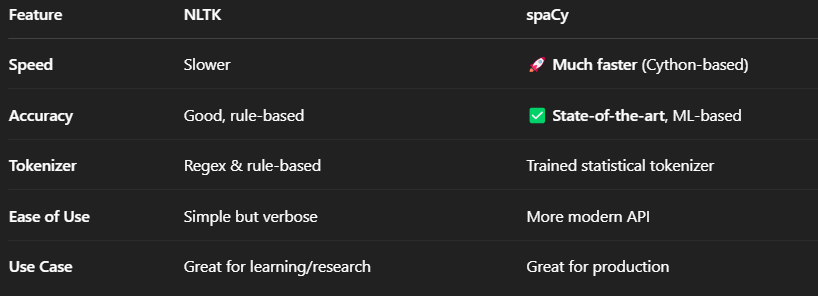

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
for i in nlp('I have a Ph.D in A.I'):
  print(i)

I
have
a
Ph
.
D
in
A.I


###Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stems(text):
  return ' '.join([ps.stem(word) for word in text.split()])

In [ ]:
example = 'run running hunt hunted hunting'
stems(example)

'run run hunt hunt hunt'

###Lemmatization

In [ ]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
sentence = "The hunter was running as fast as he could run but he was hunted down by the hunting wolves"
#one may apply other preprocessing steps before applying lemmatization
tokens = nltk.word_tokenize(sentence)
print('Word\tLemma')
for token in tokens:
  lemma = lemmatizer.lemmatize(token,pos='v')
  print ("{0:20}{1:20}".format(token,lemma))

Word	Lemma
The                 The                 
hunter              hunter              
was                 be                  
running             run                 
as                  as                  
fast                fast                
as                  as                  
he                  he                  
could               could               
run                 run                 
but                 but                 
he                  he                  
was                 be                  
hunted              hunt                
down                down                
by                  by                  
the                 the                 
hunting             hunt                
wolves              wolves              
